# Estudio de cuentas de twitter

En este notebook se estudiará las cuentas autores de los threads de estudio. Esta información se encuentra alojada en una base de datos local construida sobre mongoDB.

Primero se calcula un valor que relaciona la cantidad de seguidores con la cantidad de seguidos, la cual se basará en la función sigmoidea.

Luego de obtener un valor se observa el comportamiento del puntaje, primero graficando los valores obtenidos, luego graficando los valores obtenidos eliminando los 5, 10, 20 y 30 valores maximos.

In [1]:
import numpy as np
import matplotlib
import pandas as pd

In [2]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Span

output_notebook()

Loading BokehJS ...

In [3]:
import pymongo
from twython import Twython
import pandas as pd
#conexion mongo
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["twitter-memoria"]
coleccion_completa = mydb["csv_all"]
bd_usuarios = mydb["usuarios"]


#obtener llaves Twitter
llaves_bd = mydb["llaves"]
llaves = llaves_bd.find_one()

APP_KEY = llaves["API_KEY"]
ACCESS_TOKEN  = llaves["ACCESS_TOKEN_T"]
twitter       = Twython(APP_KEY, access_token=ACCESS_TOKEN)


In [4]:
usuarios = bd_usuarios.find({})
puntaje_por_id = {}
lista_usuarios = []
lista_puntajes_unicos = []
lista_puntajes_usuario = []
lista_cant_tweets = []
lista_punt_2 = []

for usuario in usuarios:
    puntaje_aux = 0
    puntaje_aux_2 = 0
    userid = usuario["id"]
    seguidores = usuario["followers_count"] + 1
    amigos = usuario["friends_count"] + 1
    estados = usuario["statuses_count"] + 1
    #puntaje_aux = ((seguidores-amigos)/(seguidores+amigos-abs(seguidores-amigos)))
    puntaje_aux = (np.log10(1+seguidores))/(1+np.log10(1+amigos))
    puntaje_aux_2 = puntaje_aux*estados
    puntaje_por_id[userid] = puntaje_aux
    lista_puntajes_usuario.append(puntaje_aux)
    lista_usuarios.append(userid)
    lista_cant_tweets.append(estados)
    lista_punt_2.append(puntaje_aux_2)
    if puntaje_aux not in lista_puntajes_unicos:
        lista_puntajes_unicos.append(puntaje_aux)


In [5]:
print(len(lista_puntajes_usuario))
print(len(lista_puntajes_unicos))

265
265


In [6]:
df_puntajes = pd.DataFrame.from_dict(puntaje_por_id, orient='index', columns=['puntaje'])
df_puntajes["user_id"] = df_puntajes.index
df_puntajes = df_puntajes.reset_index(drop=True)
df_puntajes.head()

,puntaje,user_id
0,1.045443,3311036150
1,0.951682,938139949710405633
2,1.003695,857087659008815105
3,1.236293,305073570
4,0.714612,856850515


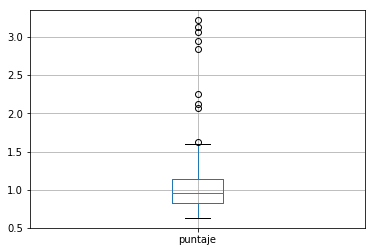

In [14]:
df_puntajes.boxplot(column = "puntaje")

In [8]:
grafico = figure(plot_width=700, 
           plot_height=350, 
           title='puntajes unicos', 
           background_fill_color="#f2f3f7", 
           y_axis_label='puntaje')

grafico.line(list(range(0,len(lista_puntajes_unicos))), lista_puntajes_unicos,line_color='#cd2626', legend='Puntaje')


show(grafico)

In [9]:
lista_aux_0 = lista_puntajes_unicos.copy()
for i in range(1,5):
    lista_aux_0.remove(max(lista_aux_0))

grafico = figure(plot_width=700, 
           plot_height=350, 
           title='puntajes unicos menos 5 maximos', 
           background_fill_color="#f2f3f7", 
           y_axis_label="puntaje")

grafico.line(list(range(0,len(lista_aux_0))), lista_aux_0,line_color='#cd2626', legend='Puntaje')


show(grafico)

In [10]:
lista_aux_1 = lista_puntajes_unicos.copy()
for i in range(1,10):
    lista_aux_1.remove(max(lista_aux_1))

grafico = figure(plot_width=700, 
           plot_height=350, 
           title='puntajes unicos menos 10 maximos', 
           background_fill_color="#f2f3f7", 
           y_axis_label='puntaje')

grafico.line(list(range(0,len(lista_aux_1))), lista_aux_1,line_color='#cd2626', legend='Puntaje')


show(grafico)

In [11]:
lista_aux_2 = lista_puntajes_unicos.copy()
for i in range(1,20):
    lista_aux_2.remove(max(lista_aux_2))

grafico = figure(plot_width=700, 
           plot_height=350, 
           title='puntajes unicos menos 20 maximos', 
           background_fill_color="#f2f3f7", 
           y_axis_label='puntaje')

grafico.line(list(range(0,len(lista_aux_2))), lista_aux_2,line_color='#cd2626', legend='Puntaje')


show(grafico)

### Cantidad de tweets

In [12]:
lista_tweets_aux_1 = lista_cant_tweets.copy()
lista = lista_tweets_aux_1

grafico = figure(plot_width=700, 
           plot_height=350, 
           title='cantidad de tweets', 
           background_fill_color="#f2f3f7", 
           y_axis_label='cant tweets')

grafico.line(list(range(0,len(lista))), lista,line_color='#cd2626', legend='Puntaje')


show(grafico)

In [13]:
lista_tweets_aux_1 = lista_cant_tweets.copy()
for i in range(1,5):
    lista_tweets_aux_1.remove(max(lista_tweets_aux_1))

lista = lista_tweets_aux_1


grafico = figure(plot_width=700, 
           plot_height=350, 
           title='cantidad de tweets menos 5 maximos', 
           background_fill_color="#f2f3f7", 
           y_axis_label='cant tweets')

grafico.line(list(range(0,len(lista))), lista,line_color='#cd2626', legend='Puntaje')


show(grafico)